<a href="https://colab.research.google.com/github/Anastasia-Makarova/DATA_homeworks/blob/main/Hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive

from matplotlib.patches import ConnectionPatch

In [114]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [115]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/2017_jun_final.csv')

Прочитайте отриману таблицю, використовуючи метод head


In [116]:
display(data.head())

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


Визначте розмір таблиці за допомогою методу shape

In [117]:
print(data.shape)

(8704, 25)


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [118]:
display(data.dtypes)

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [119]:
missing_values = data.isnull().sum()
print(f"Количество пропусков в каждой колонке:\n{missing_values}")

Количество пропусков в каждой колонке:
N                                      0
Посада                                 0
Мова програмування                  3850
Спеціалізація                       7219
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Університет                          358
Ще студент                             0
Рівень англійської                     0
Предметна область                    223
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта            

Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [120]:
columns_to_keep = ['Мова програмування']
columns_with_missing_values = data.columns[data.isnull().any()].drop(columns_to_keep).tolist()
print(columns_with_missing_values)

['Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']


In [121]:
data_cleaned_columns = data.drop(columns_with_missing_values, axis=1)
display(data_cleaned_columns.columns)

Index(['N', 'Посада', 'Мова програмування', 'Загальний досвід роботи',
       'Досвід роботи на поточному місці', 'Зарплата на місяць',
       'Зміна зарплати за 12 місяців', 'Місто', 'Розмір компанії',
       'Тип компанії', 'Стать', 'Вік', 'Освіта', 'Ще студент',
       'Рівень англійської', 'Дата заповнення', 'User.Agent', 'exp',
       'current_job_exp', 'salary'],
      dtype='object')

Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [122]:
missing_values = data_cleaned_columns.isnull().sum()
print(f"Количество пропусков в каждой колонке:\n{missing_values}")

Количество пропусков в каждой колонке:
N                                      0
Посада                                 0
Мова програмування                  3850
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Ще студент                             0
Рівень англійської                     0
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64


Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [123]:
data_cleaned_rows = data.dropna(axis=0)

Визначте новий розмір таблиці за допомогою методу shape

In [124]:
print(data_cleaned_rows.shape)

(0, 25)


Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [125]:
python_data = data[data['Мова програмування'] == 'Python']

display(python_data)

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
12,13,Software Engineer,Python,NaN,1,менше 3 місяців,800,200,Київ,до 50 осіб,...,False,Pre-intermediate (нище середнього),"Веб-розробка,Інше",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV
68,69,Software Engineer,Python,NaN,1.5,0.5,900,900,Київ,до 10 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV
87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Київ,до 10 осіб,...,True,Upper-Intermediate (вище середнього),"Веб-розробка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV
114,115,Junior Software Engineer,Python,NaN,1.5,0.5,685,250,Київ,до 1000 осіб,...,False,Intermediate (середній),Інше,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV
143,144,Junior Software Engineer,Python,NaN,1,1,750,250,Київ,до 10 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,NaN,5,1,2000,800,Запоріжжя,до 50 осіб,...,False,Intermediate (середній),Веб-розробка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV
8625,8626,Software Engineer,Python,NaN,4,1,1750,0,Київ,більше 1000 осіб,...,False,Intermediate (середній),Веб-розробка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV
8635,8636,Senior Software Engineer,Python,NaN,10 і більше років,менше 3 місяців,4000,1300,Віддалено,до 10 осіб,...,False,Upper-Intermediate (вище середнього),Веб-розробка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV
8673,8674,Junior Software Engineer,Python,NaN,0.5,0.5,350,50,Київ,до 50 осіб,...,False,Intermediate (середній),Веб-розробка,12/07/2017 9:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350,NaN,DEV


Визначте розмір таблиці python_data за допомогою методу shape

In [126]:
print(python_data.shape)

(207, 25)


Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [127]:
grouped_data = python_data.groupby("Посада")
display(grouped_data)

Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [128]:
aggregated_data = python_data.groupby('Посада').agg({'Зарплата на місяць': ['min', 'max']})

display(aggregated_data)

Зарплата на місяць      
                                        min   max
Посада                                           
Junior Software Engineer                100  1250
Senior Software Engineer               1300  9200
Software Engineer                       500  5400
System Architect                       3000  5000
Technical Lead                         1425  6200

Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [129]:
def fill_avg_salary(row):
    return row['Зарплата на місяць'].mean()

aggregated_data['avg'] = aggregated_data.apply(fill_avg_salary, axis=1)
display(aggregated_data)

Зарплата на місяць           avg
                                        min   max        
Посада                                                   
Junior Software Engineer                100  1250   675.0
Senior Software Engineer               1300  9200  5250.0
Software Engineer                       500  5400  2950.0
System Architect                       3000  5000  4000.0
Technical Lead                         1425  6200  3812.5

Створіть описову статистику за допомогою методу describe для нового стовпчика

In [130]:
avg_sallary_desc = aggregated_data['avg'].describe()
display(avg_sallary_desc)

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

Збережіть отриману таблицю в CSV файл

In [131]:
avg_sallary_desc.to_csv("avg_sallary_desc.csv", index=True)

# Візуалізація

додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

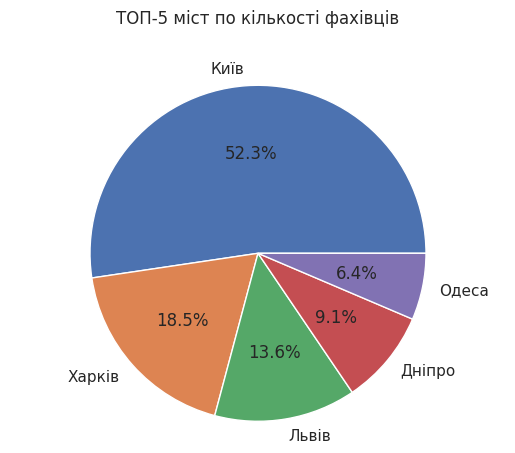

In [132]:
ppl_by_city = data.groupby('Місто')['Місто'].count().sort_values(ascending=False)
cities = ppl_by_city.index.tolist()

labels = cities[:5]
fig, ax = plt.subplots()

ax.pie(
    ppl_by_city[:5],
    labels=labels,
    autopct='%1.1f%%',
    # colors = ['steelblue', 'paleturquoise'],
    )

plt.title('ТОП-5 міст по кількості фахівців', y=1.1)
plt.axis('equal')
plt.show()

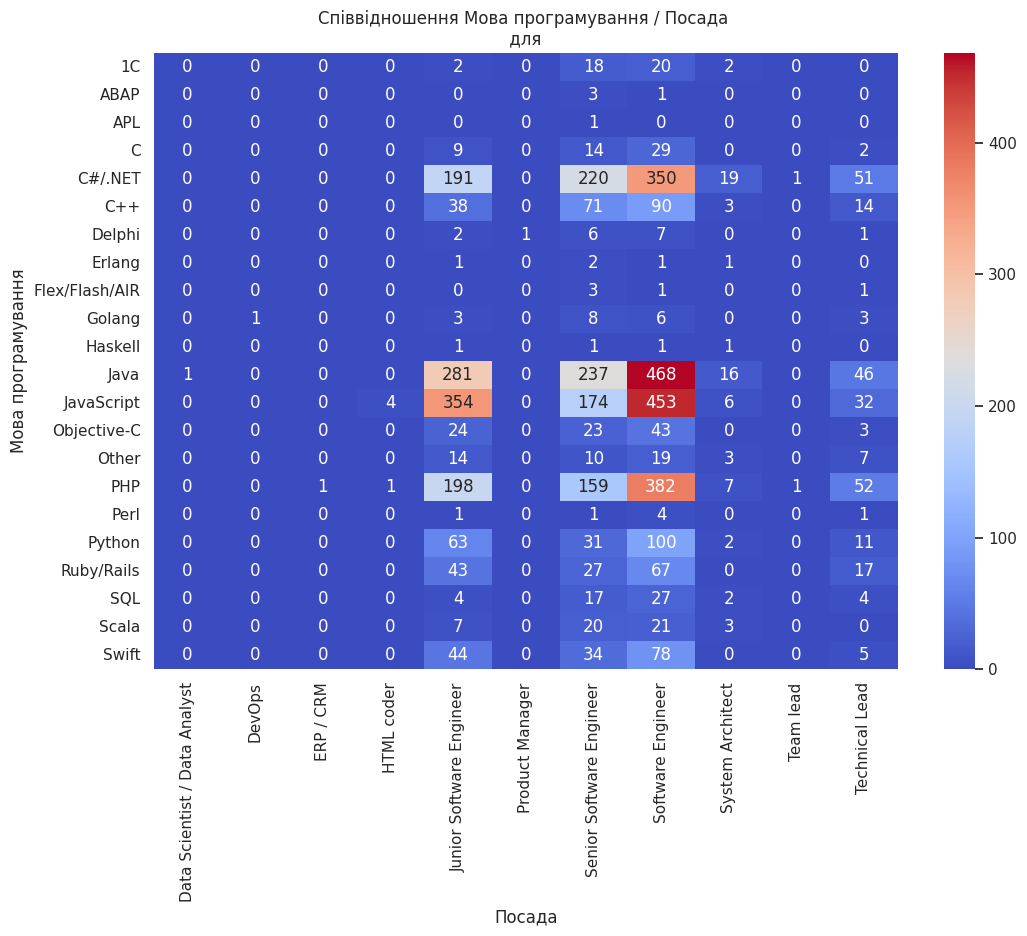

In [133]:

# Группировка данных по комбинации "Мова програмування" и "Посада" и подсчет числа строк в каждой группе
grouped_data = data.groupby(['Мова програмування', 'Посада']).size().reset_index(name='Количество')

# Построение сводной таблицы для визуализации
pivot_table = grouped_data.pivot_table(index='Мова програмування', columns='Посада', values='Количество', aggfunc='sum', fill_value=0)

# Визуализация тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d')
plt.title('Співвідношення Мова програмування / Посада \n для ')
plt.xlabel('Посада')
plt.ylabel('Мова програмування')
plt.show()

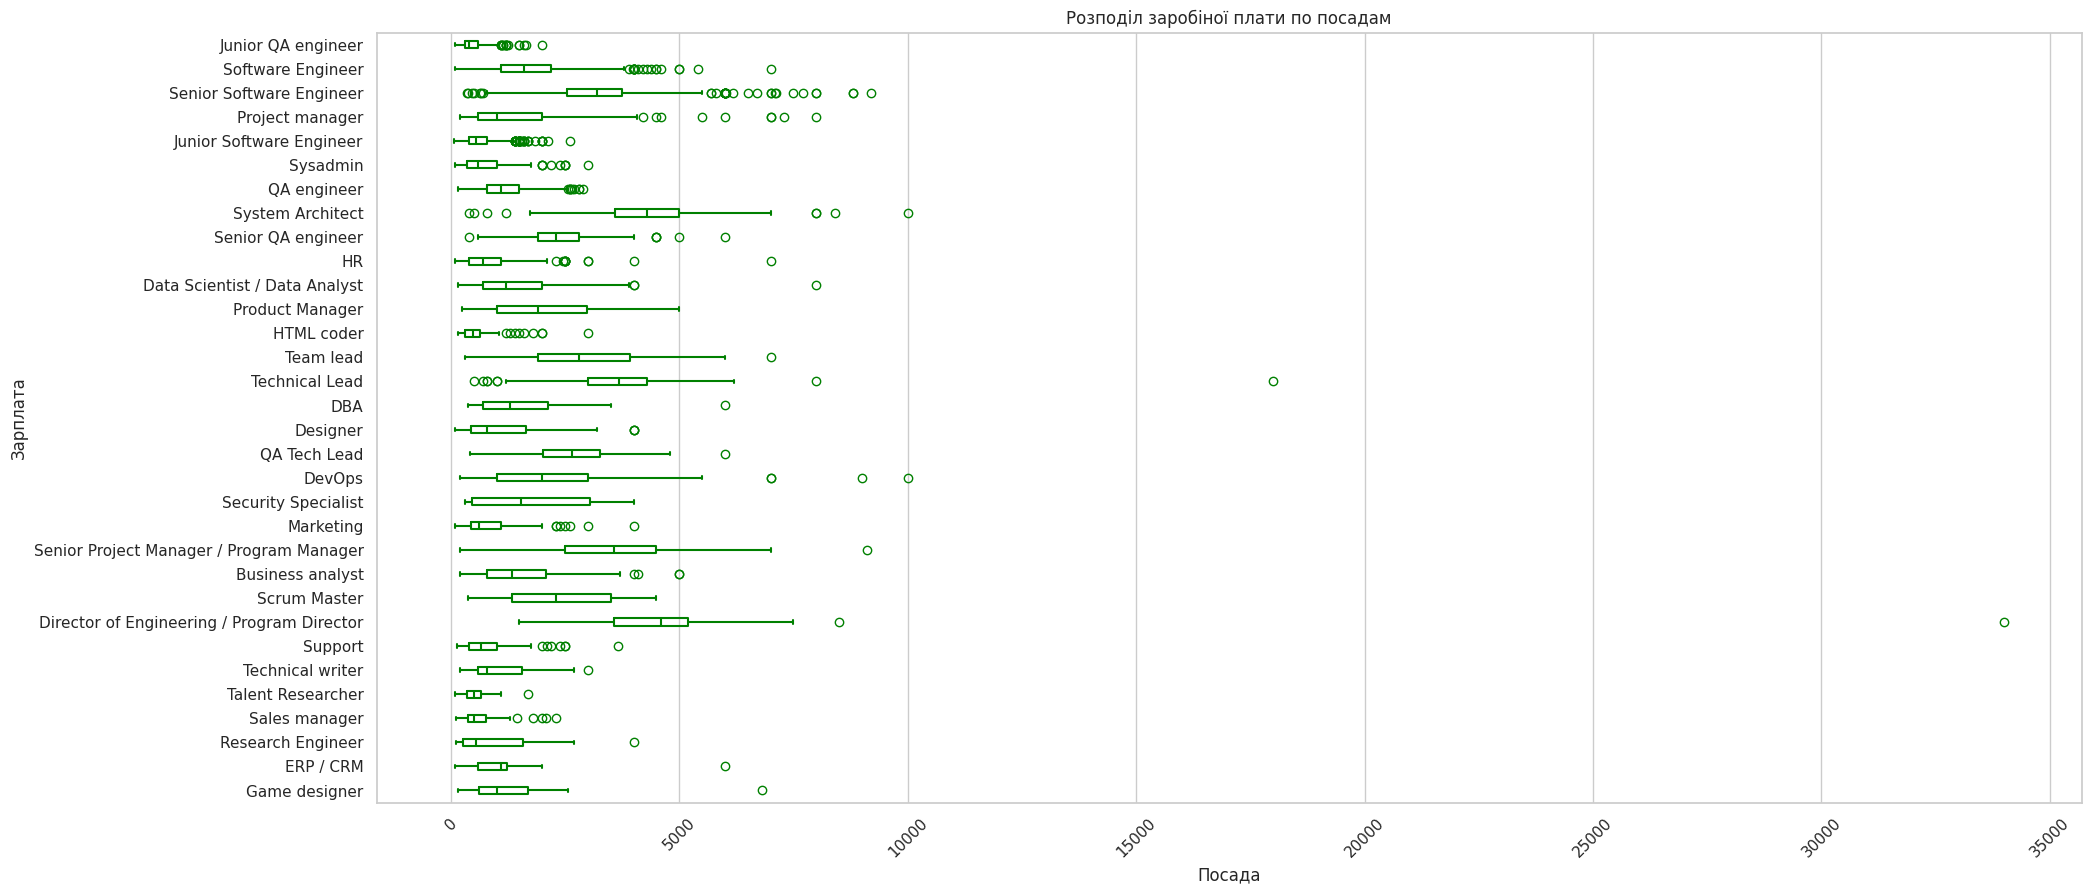

In [134]:
plt.figure(figsize=(22, 10))
sns.boxplot(x='Зарплата на місяць', y='Посада', data=data, fill=False, width=.3, color='green')
plt.xticks(rotation=45)
plt.title('Розподіл заробіної плати по посадам')
plt.xlabel('Посада')
plt.ylabel('Зарплата')
plt.show()

<Axes: title={'center': 'Співвідношення жінок до загальної кількості фахівців з розділом по посадам'}, xlabel='Всього', ylabel='Посада'>

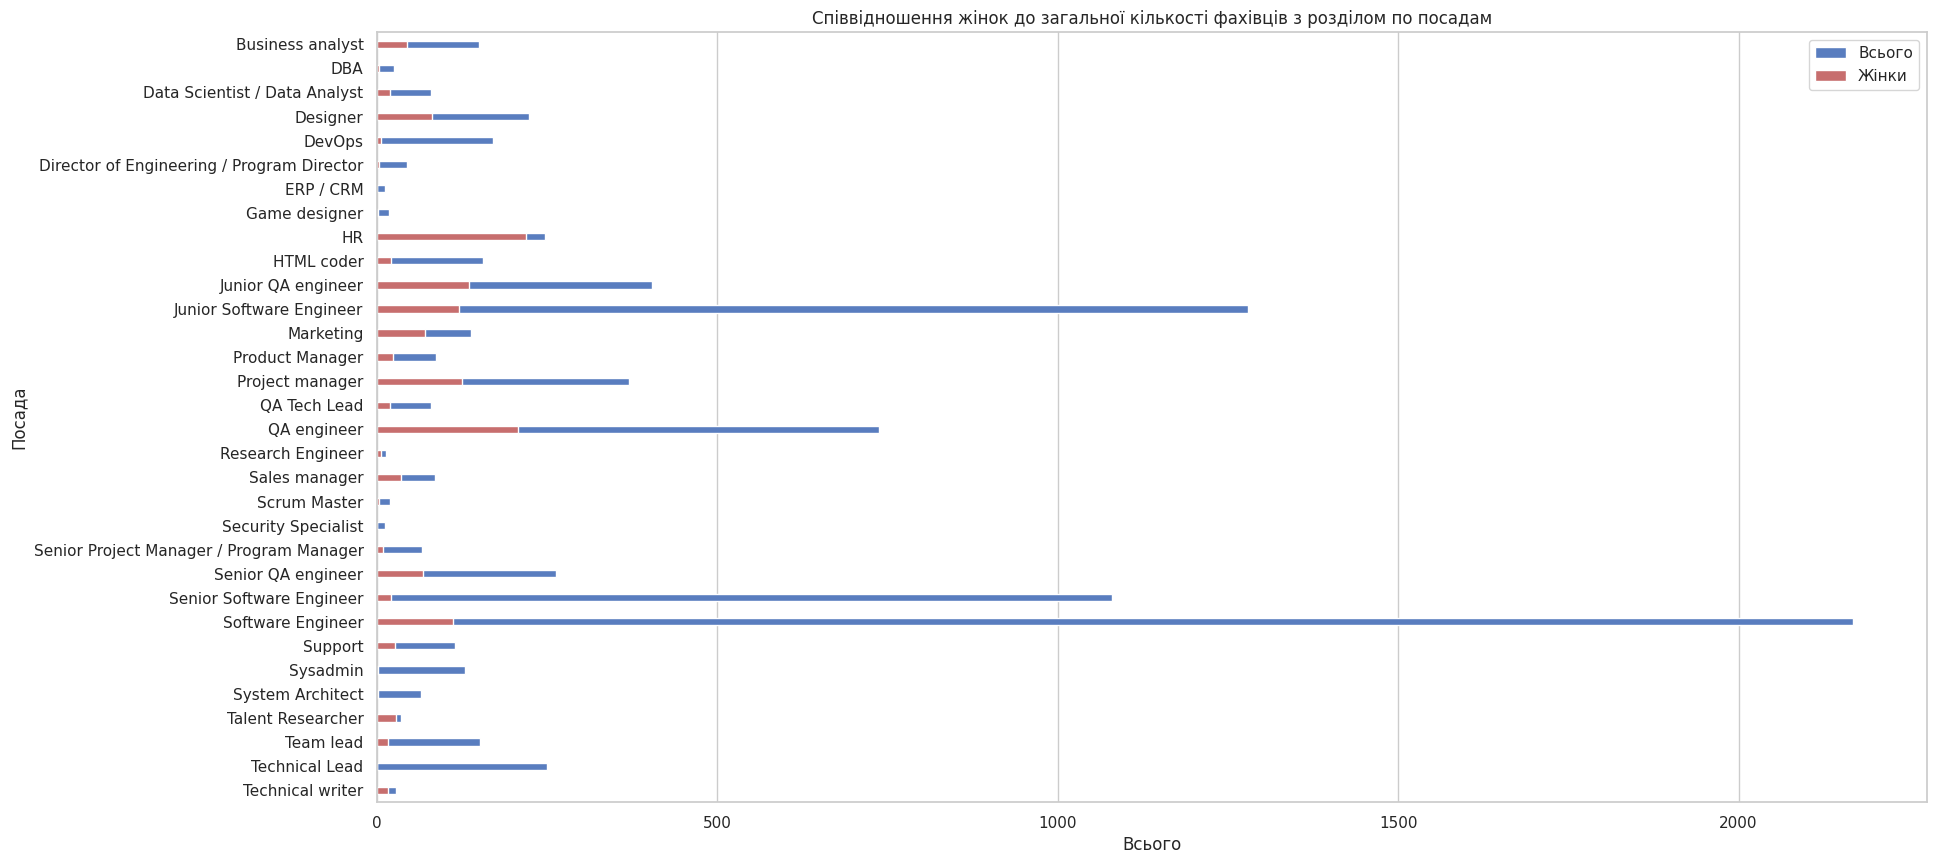

In [135]:
pivot_table = data.groupby(['Посада', 'Стать']).size().reset_index(name='Кількість')
pivot_table = pivot_table.pivot_table(index='Посада', columns='Стать', values='Кількість', fill_value=0)
pivot_table = pivot_table.assign(Всього=pivot_table.iloc[:, :2].sum(axis=1))


f, ax = plt.subplots(figsize=(20, 10))

sns.set_color_codes("muted")
sns.barplot(x="Всього", y="Посада", data=pivot_table, width=.3,
            label="Всього", color="b").set(title='Співвідношення жінок до загальної кількості фахівців з розділом по посадам')

sns.set_color_codes("muted")
sns.barplot(x="жіноча", y="Посада", data=pivot_table, width=.3,
            label="Жінки", color="r")

